In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/deepjain/python/mymoviesdb.csv",lineterminator='\n')
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [4]:
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# • Exploration Summary 
# • we have a dataframe consisting of 9827 rows and 9 columns.
# • our dataset looks a bit tidy with no NaNs nor duplicated values.
# • Release_Date column needs to be casted into date time and to extract only the year value.
# • Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
# • there is noticable outliers in Popularity column
# • Vote_Average bettter be categorised for proper analysis.
# • Genre column has comma saperated values and white spaces that needs to be handled andcastedinto category. Exploration Summary

## Converting Columns dtype

In [7]:
df['Release_Date'] = df['Release_Date'].fillna(0)
df['Release_Date']=pd.to_datetime(df['Release_Date'],errors='coerce') #Converting 'Release_Date' column from 'obj' to 'datetime' format.
df['Release_Date']=df['Release_Date'].dt.year #we only need 'years' of movie release.

In [12]:
df['Vote_Count'] = df['Vote_Count'].fillna(0)  #Converting 'Vote_Count' column from 'obj' to 'int' format.
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce',downcast='integer')

In [13]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')  #Converting 'Vote_Avergae' column from 'obj' to 'Float' format.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   float64
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9837 non-null   int16  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(3), int16(1), object(5)
memory usage: 634.2+ KB


## Dropping the Columns

In [15]:
cols=['Overview','Original_Language','Poster_Url']

In [16]:
df.drop(cols,axis=1,inplace=True,errors=True)


In [17]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


## Categorizing Vote_Averge Columns

we going to make 4 categories -
popular,
average,
below_average,
not_popular,

In [59]:
def categorize_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df


In [60]:
labels=['not_popular','below_avg','avergae','popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'avergae', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'avergae' < 'popular']

In [61]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,avergae,"Action, Adventure, Thriller, War"


In [62]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
avergae        2411
below_avg      2398
Name: count, dtype: int64

In [63]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [64]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,avergae,"Action, Adventure, Thriller, War"


## we'd split genres into a list and then explode our dataframe to have only on genre per row for each movie.

In [65]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


In [66]:
# casting column into category

df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  float64 
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(3), object(1)
memory usage: 849.4+ KB


In [68]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [69]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


## Data Visualization

In [70]:
sns.set_style('whitegrid')

### What is the most frequent genre of movie released on netflix?

In [32]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

Text(0.5, 1.0, 'Genre column distribution')

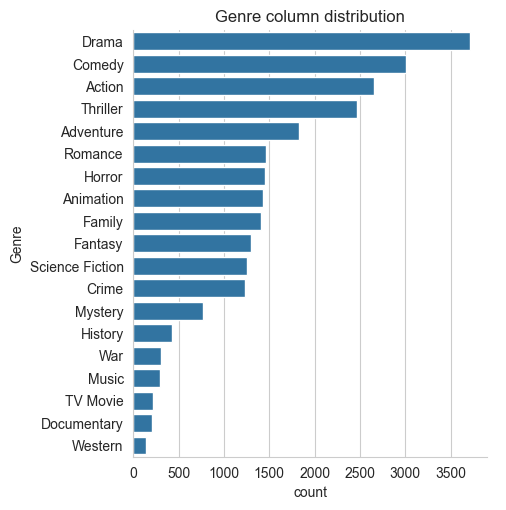

In [37]:
sns.catplot(y='Genre',data=df,kind='count',
           order=df['Genre'].value_counts().index)
plt.title('Genre column distribution')

### Which has highest votes in vote avg column?

In [38]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


Text(0.5, 1.0, 'Vote Distribution')

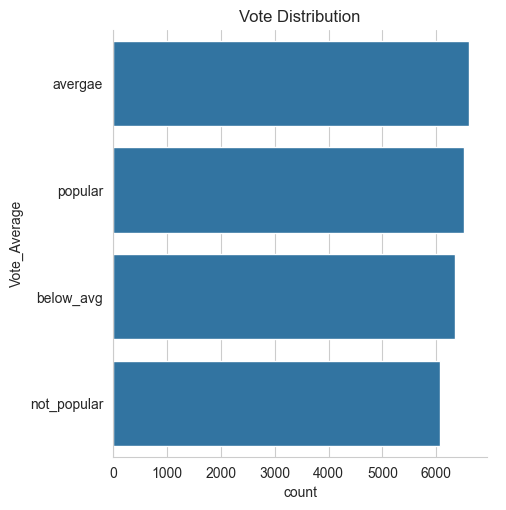

In [42]:
sns.catplot(y='Vote_Average',data=df,kind='count',
            order=df['Vote_Average'].value_counts().index)
plt.title('Vote Distribution')

### What movie got the highest popularity? what it's genre?

In [44]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


### What movie got the lowest popularity? what it's genre?

In [ ]:
df[df['Popularity']==df['Popularity'].min()]

### Which year has the most filmmed movies?

In [ ]:
df['Release_Date'].hist()
plt.title('Release Dtae column Distribution')
plt.show()

Conclusion
Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among19other genres.

Q2: What genres has highest votes?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.
    
Q3: What movie got the highest popularity? what's its genre?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.
    
Q4: What movie got the lowest popularity? what's its genre?
The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama,'sci-fi'
    
Q5: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset.